In [2]:
import statistics 
import numpy
import math
import numpy as np
from numpy import log as ln
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.integrate import quad 
from scipy.stats import chisquare
from scipy.misc import derivative
# mLambda = dsin(theta)

mLambda = [-407.83,-437.749,-491.607,-546.074,-576.970]
theta = [-9.16,-10.13,-17.5,-19.13,-19.95]
set=[1]

In [3]:
def ErrorBar(theta):
    dx = []
    for i in theta:
        deriv = derivative(np.sin(theta),n=1,dx=.1)
        dx.append(deriv)
    return dx

In [4]:
def fsin(x):
    sinx = []
    for i in x:
        S = np.cos(i*np.pi/180)
        sinx.append(S)
    return sinx

In [5]:
def farcsin(x):
    arcsinx = []
    for i in x:
        S = np.arcsin(i)
        S = S*(180/np.pi)
        arcsinx.append(S)
    return arcsinx

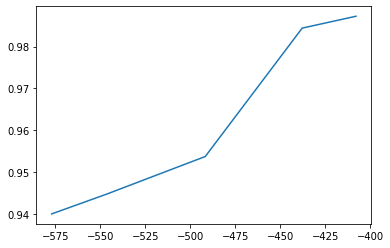

In [6]:
y = fsin(theta)
x = mLambda
plt.plot(x,y)

In [7]:
ErrorBar(theta)

TypeError: derivative() missing 1 required positional argument: 'x0'

In [8]:
fsin(theta)

[0.9872476426302981,
 0.9844112232220046,
 0.9537169507482269,
 0.9447774517425483,
 0.9399907318200801]

In [9]:
def Resid(y):
    fy = []
    for i in y:
        res = 784.611*i - 287.308
        fy.append(res)
    return fy
    


In [10]:
Resid(fsin(theta))

[487.2973601318008,
 485.07187426344024,
 460.9888104435171,
 453.97478118917263,
 450.2190680840848]

In [72]:
fsin(theta)

[0.9872476426302981,
 0.9844112232220046,
 0.9537169507482269,
 0.9447774517425483,
 0.9399907318200801]

In [17]:
l = [435.833,546.074,579.6]
a = [4.958333335,2.204166664999999,4.1875]

In [11]:
def Function(theta1,theta2):
    return (np.sin(theta1-theta2)+np.sin(theta2))

In [67]:
l = [435.833,546.074,579.6]
a = [4.958333335,2.204166664999999,4.1875]
a2 = [7.225626994452014, 2.1028500870884215, 6.096874583777767]
theta2=[]
for i in range(len(a)):
     hold=-2*(np.arccos((l[i]/600)/2*np.sin(a[i]/2)) -a[i])
     theta2.append(hold)
#plt.plot(a,theta2)
print(theta2)
yarray=[]
for i in range(len(a)):
    Function(a[i],a2[i])
    y = Function(a[i],a2[i])
    yarray=np.append(yarray,y)
#plt.plot(a)
#plt.plot(a2)
#print(yarray)
darray=[]
for i in range(len(l)):
    d = l[i]/yarray[i]
    darray.append(d)
#print(darray)

[7.225626994452014, 2.102850087088422, 6.096874583777767]
[ 0.0419018   0.96291034 -1.12846258]


614.8152002267747


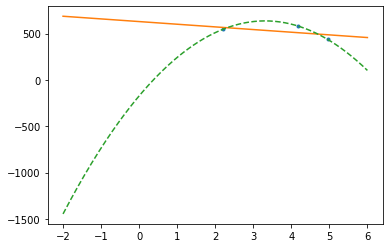

        2
-73.86 x + 489 x - 172.9


In [85]:

x = np.array([4.958333335,2.204166664999999,4.1875])
y = np.array([435.833,546.074,579.6])
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
import matplotlib.pyplot as plt
xp = np.linspace(-2, 6, 300)
print(p(0.5))
p1 = np.poly1d(np.polyfit(x, y, 2))
plt.plot(x, y, '.', xp, p(xp), '-', xp, p1(xp), '--')
plt.show()
#print(p)
print(p1)

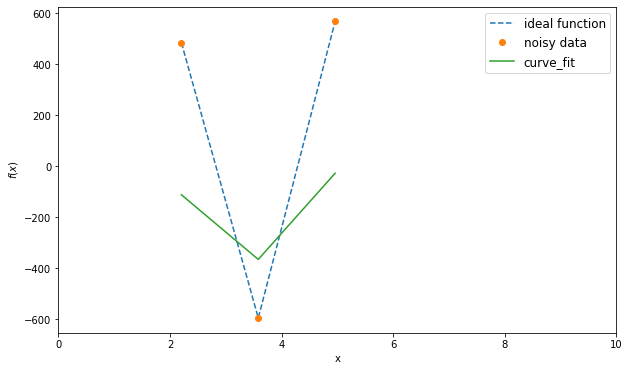

original coefficients: 600.000
fitted   coefficients: -368.156


In [58]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=[10, 6])


#define the function
f = lambda x,a,x2: a*np.sin(x-x2)+np.sin(x2)
#4.958333335,2.204166664999999,4.1875
#define the paramters for the plot
x_min, x_max = 2.204166664999999, 4.958333335
x2_min,x2_max=0,10
npoints = 3
a=600

x = np.linspace(x_min, x_max, npoints)
x2 = np.linspace(x2_min, x2_max, npoints)
y = f(x,a,x2) + np.random.rand(npoints) - 0.5

#do the curve fit
params, extras = curve_fit(f, x, y)

plt.plot(x,f(x,a,x2), '--', label='ideal function')
plt.plot(x,y, 'o', label='noisy data')
plt.plot(x,f(x,params[0],params[1]), label='curve_fit')

plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.xlim([x2_min, x2_max])
plt.legend(fontsize=12)
plt.show()
print('original coefficients: %6.3f' %(a))
print('fitted   coefficients: %6.3f' %(params[0]))

In [ ]:
# n*lambda/d = np.sin(x-y)+np.sin(y)